# Análisis exploratorio de datos de Kaggle (ordenadores)

>## Autor  
>  
>**Apellidos:** González Fornell  
>**Nombre:** José Manuel  
>  
>**Email:** josemanuelgonzalezfornell@gmail.com
>  
>  

## Índice  
  
1. [Importancia de las librerias](#1)
2. [Importación de base de datos](#2)
3. [Sample Table](#3)
    1. [Exploración inicial](#31)
    2. [Limpieza de datos](#32)
    3. [Análisis univariante](#33)
    4. [Análisis bivariante](#34)
    5. [Outliers](#35)
    6. [Exportación a csv](#36)
4. [Train Table](#4)
    1. [Exploración inicial](#41)
    2. [Limpieza de datos](#42)
    3. [Análisis univariante](#43)
    4. [Análisis bivariante](#44)
    5. [Outliers](#45)
    6. [Exportación a csv](#46)
5. [Test Table](#5)
    1. [Exploración inicial](#51)
    2. [Limpieza de datos](#52)
    3. [Análisis univariante](#53)
    4. [Análisis bivariante](#54)
    5. [Outliers](#55)
    6. [Exportación a csv](#56)


## 1. Importancia de las librerias<a id='1'></a>

Lo primero que se realiza es la importación de las librerías necesarias para realizar el análisis. En este caso las librerías utilizadas son las siguientes:  
* DataBase. Librería propia importada con el psudónimo "db".
* Pandas. Importada con el pseudónimo "pd".
* Regular expresion.
* Functions. Librería propia importada con pseudónimo "fn"


In [1]:
import utils.DataBase as db
import pandas as pd
import re
import utils.Functions as fn


## 2. Importación de base de datos  <a id='2'></a>
  
Se importa la base de datos con la que se quiere trabajar. Se usa la clase DataBase una clase de creación propia.

In [2]:
# Importa la base de datos con la clase DataBase

database = db.DataBase("postgresql", "arzplujz",
                       "nXVzs5UZnyrgmKe9fT4gY2_v0RNzOMFC", "dumbo.db.elephantsql.com", "arzplujz")


## 3. Sample Table<a id='3'></a>  
  
Se importa la tabla Sample con la que se quiere trabajar. Se usa el método get_table.

In [3]:
# Importa la tabla Sample

sample_tb = database.get_table("Sample")
sample_tb


,laptop_ID,Price_euros
0,750,500.0
1,726,500.0
2,633,500.0
3,363,650.0
4,319,650.0
...,...,...
386,693,650.0
387,1132,500.0
388,49,650.0
389,1243,650.0


### 3.1. Exploración inicial<a id='31'></a>  
  
Se realiza una exploración inicial del dataframe. Se hace un análisis univariante antees de la limpieza para posteriormente observar la diferencia.

In [4]:
# Realiza una exploración inicial de la tabla

sample_tb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   laptop_ID    391 non-null    int64  
 1   Price_euros  391 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.2 KB


In [5]:
# Realiza un análisis estadístico breve

sample_tb.describe(include="all")

,laptop_ID,Price_euros
count,391.000000,391.000000
mean,638.588235,576.726343
std,384.962565,75.076196
min,3.000000,500.000000
25%,293.500000,500.000000
50%,612.000000,650.000000
75%,983.500000,650.000000
max,1320.000000,650.000000


Análisis univariante de laptop_ID:


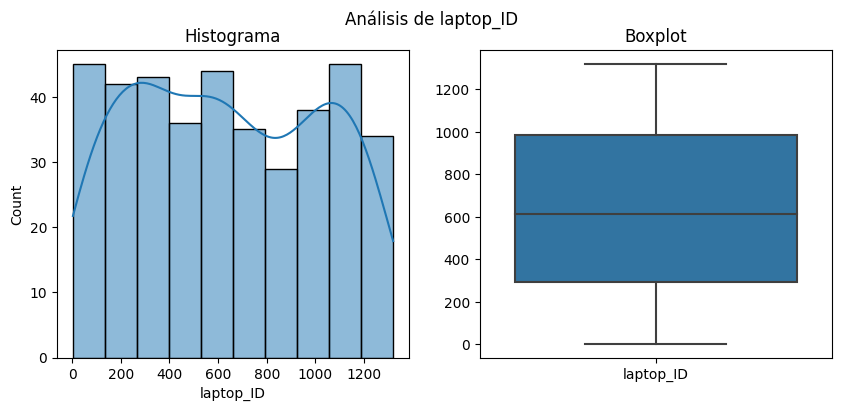

La columna laptop_ID no presenta una distribución normal



Análisis univariante de Price_euros:


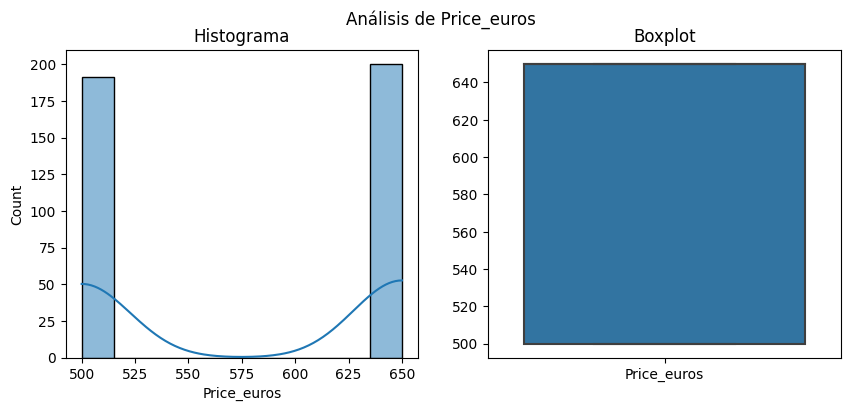

La columna Price_euros no presenta una distribución normal



Número de variables que siguen una distribución normal: 0
Número de variables que no siguen una distribución normal: 2


,Media,Mediana,Moda,Varianza,Desviacion_estandar,Percentil_25,Percentil_75,K_test,p_value,Distribución
Atributos,,,,,,,,,,
laptop_ID,638.588235,612.0,3,148196.176169,384.962565,293.5,983.5,0.99865,0.0,No normal
Price_euros,576.726343,650.0,650.0,5636.435176,75.076196,500.0,650.0,1.00000,0.0,No normal


In [6]:
# Realiza un análisis univariante

fn.get_univariate_analysis(sample_tb)

### 3.2. Limpieza de datos<a id='32'></a>  
  
Se realiza una limpieza de datos de la tabla. En este caso se establece la columna laptop_ID como índice.

In [7]:
# Establece la columna laptop_ID como índice

sample_tb.set_index("laptop_ID", inplace=True)


In [8]:
# Muestra la tabla ya limpia

sample_tb

,Price_euros
laptop_ID,
750,500.0
726,500.0
633,500.0
363,650.0
319,650.0
...,...
693,650.0
1132,500.0
49,650.0


### 3.3. Análisis univariante<a id='33'></a>  
  
Se procede arealizar el análisis univariante de la tabla. Para ello se usa la función propia get_univariate_analysis. Se compara con el análisis univariante previo.

Análisis univariante de Price_euros:


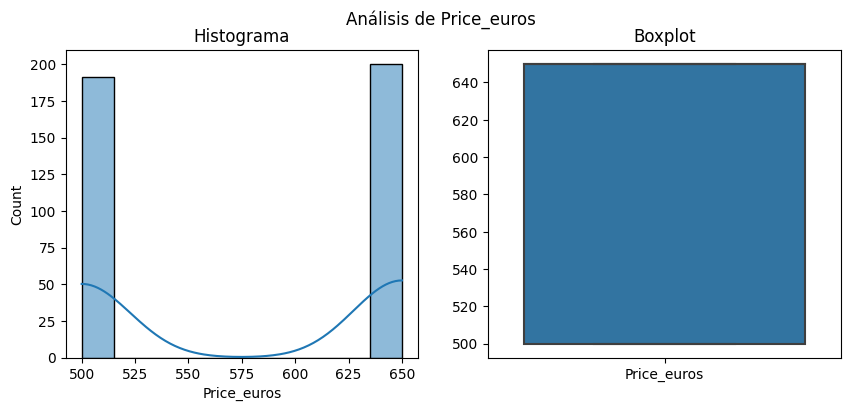

La columna Price_euros no presenta una distribución normal



Número de variables que siguen una distribución normal: 0
Número de variables que no siguen una distribución normal: 1


,Media,Mediana,Moda,Varianza,Desviacion_estandar,Percentil_25,Percentil_75,K_test,p_value,Distribución
Atributos,,,,,,,,,,
Price_euros,576.726343,650.0,650.0,5636.435176,75.076196,500.0,650.0,1.0,0.0,No normal


In [9]:
# Realiza un análisis univariante

fn.get_univariate_analysis(sample_tb)


### 3.4. Análisis bivariante<a id='34'></a> 

No se realiza un análisis bivariante debido a que este DataFrame únicamente tiene una sola columna.

### 3.5. Outliers<a id='35'></a>  
  
Se buscan los outliers que tiene la tabla para tener constancia de ellos. Para ello se utiliza la función propia get_outliers().

In [10]:
# Obtiene los outliers

fn.get_outliers(sample_tb)


[{'Price_euros': 0}, {'Price_euros': []}]

### 3.6. Exportación a csv<a id='36'></a>  
  
Se exporta la tabla Sample a csv.

In [11]:
# Exporta la tabla limpia

sample_tb.to_csv("data/processed/sample.csv", sep=";")

## 4. Test Table<a id='4'></a>  

Con esta tabla y con la siguiente se usa la misma metodología y las mismas funciones que en la tabla Sample. Primero, se procede a importar la tabla Test para trabajar con ella. 

In [12]:
# Importa la tabla Test

test_tb = database.get_table("Test")
test_tb


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,750,Toshiba,Tecra X40-D-10G,Notebook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.25kg
1,633,Mediacom,SmartBook 140,Notebook,14.0,Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,2GB,32GB Flash Storage,Intel HD Graphics,Windows 10,1.4kg
2,363,Dell,Inspiron 7577,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.65kg
3,319,Asus,VivoBook Flip,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,2GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.1kg
4,14,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg
...,...,...,...,...,...,...,...,...,...,...,...,...
386,1132,Razer,Blade Stealth,Ultrabook,12.5,Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.25kg
387,49,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.3kg
388,1243,Asus,X540SA-RBPDN09 (N3710/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,1TB HDD,Intel HD Graphics 405,Windows 10,2.65kg
389,924,HP,Elitebook Folio,Ultrabook,12.5,4K Ultra HD / Touchscreen 3840x2160,Intel Core M 6Y75 1.2GHz,8GB,240GB SSD,Intel HD Graphics 515,Windows 10,1.09kg


### 4.1. Exploración inicial<a id='41'></a>  
  
Se realiza una exploración inicial del dataframe. Se hace un análisis univariante antees de la limpieza para posteriormente observar la diferencia.

In [13]:
# Realiza una exploración inicial de la tabla

test_tb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         391 non-null    int64  
 1   Company           391 non-null    object 
 2   Product           391 non-null    object 
 3   TypeName          391 non-null    object 
 4   Inches            391 non-null    float64
 5   ScreenResolution  391 non-null    object 
 6   Cpu               391 non-null    object 
 7   Ram               391 non-null    object 
 8   Memory            391 non-null    object 
 9   Gpu               391 non-null    object 
 10  OpSys             391 non-null    object 
 11  Weight            391 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 36.8+ KB


In [14]:
# Realiza un análisis estadístico breve

test_tb.describe(include="all")


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,391.000000,391,391,391,391.000000,391,391,391,391,391,391,391
unique,NaN,16,256,6,NaN,33,70,9,25,68,8,121
top,NaN,Dell,Inspiron 3567,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,NaN,85,11,212,NaN,162,57,189,119,84,321,33
mean,638.588235,NaN,NaN,NaN,15.097442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,384.962565,NaN,NaN,NaN,1.445734,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,293.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,612.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,983.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Análisis univariante de laptop_ID:


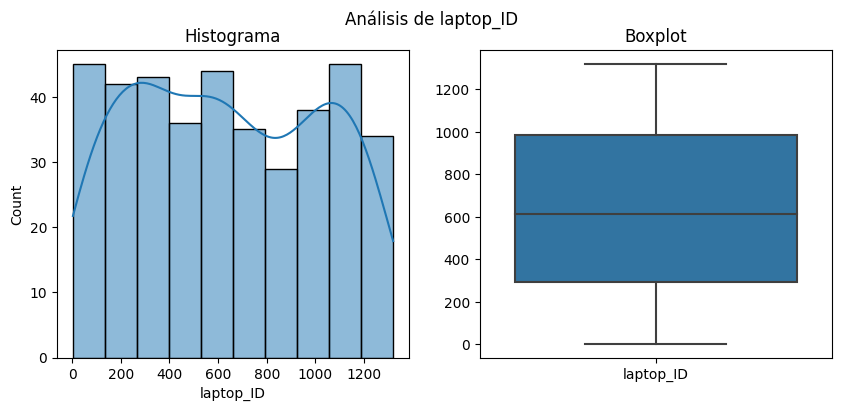

La columna laptop_ID no presenta una distribución normal



Análisis univariante de Company:
Variable categórica:
-Valores únicos:
Dell        85
Lenovo      82
HP          78
Asus        54
Acer        34
MSI         19
Toshiba     16
Apple        5
Razer        4
Samsung      4
Vero         3
Mediacom     2
Chuwi        2
Fujitsu      1
Huawei       1
LG           1
Name: Company, dtype: int64
-Número de valores únicos: 16




Análisis univariante de Product:
Variable categórica:
-Valores únicos:
Inspiron 3567                             11
XPS 13                                     9
ProBook 450                                8
250 G6                                     8
Vostro 3568                                7
                                          ..
Precision 3520                             1
X553SA-XX031T (N3050/4GB/500GB/W10)        1
X542UQ-DM117 (i3-7100U/8GB/1TB/GeForce     1
Rog GL552VW-DM201T                         1
Smartbook 142                              1
N

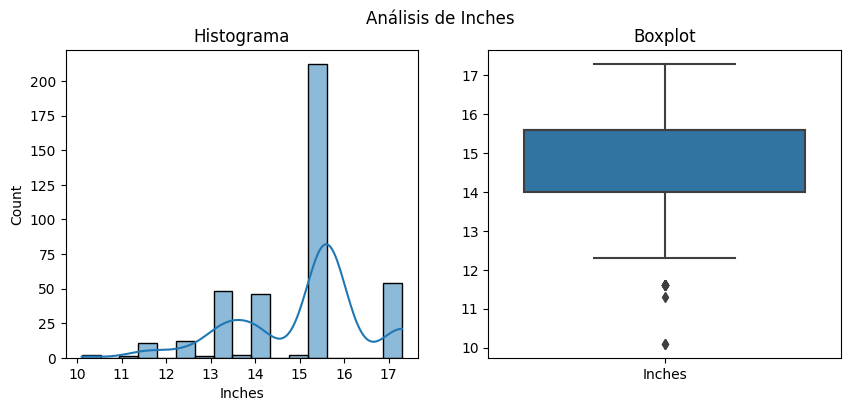

La columna Inches no presenta una distribución normal



Análisis univariante de ScreenResolution:
Variable categórica:
-Valores únicos:
Full HD 1920x1080                                162
IPS Panel Full HD 1920x1080                       72
1366x768                                          69
IPS Panel Full HD / Touchscreen 1920x1080         21
Full HD / Touchscreen 1920x1080                   11
Touchscreen 1366x768                               7
1600x900                                           7
4K Ultra HD / Touchscreen 3840x2160                5
IPS Panel Retina Display 2560x1600                 4
Quad HD+ / Touchscreen 3200x1800                   3
IPS Panel 1366x768                                 3
IPS Panel 4K Ultra HD 3840x2160                    2
4K Ultra HD 3840x2160                              2
IPS Panel Touchscreen 1920x1200                    2
IPS Panel Quad HD+ / Touchscreen 3200x1800         2
Touchscreen 2560x1440                              2
IPS Panel Touch

,Media,Mediana,Moda,Varianza,Desviacion_estandar,Percentil_25,Percentil_75,K_test,p_value,Distribución
Atributos,,,,,,,,,,
laptop_ID,638.588235,612.0,3,148196.176169,384.962565,293.5,983.5,0.99865,0.0,No normal
Inches,15.097442,15.6,15.6,2.090147,1.445734,14.0,15.6,1.00000,0.0,No normal


In [15]:
# Realiza un análisis univariante

fn.get_univariate_analysis(test_tb)

### 4.2. Limpieza de datos<a id='42'></a>  
  
Se realiza una limpieza de datos de la tabla. Se cambia el tipo de datos de las diferentes columnas, se eliminan unidas de los datos de las columnas para poder obtener unicamente el numérico y se realiza feature engineering para que cada columna tenga un dato concreto.

In [16]:
# Establece la columna laptop_ID como índice
test_tb.set_index("laptop_ID", inplace=True)

# Cambia el tipo de datos de la columna Company
test_tb["Company"] = test_tb["Company"].astype("category")

# Cambia el tipo de datos de la columna TypeName
test_tb["TypeName"] = test_tb["TypeName"].astype("category")

# Crea una nueva columna llamada Touchscreen que determina aquellos laptops que tienen Touchscreen
test_tb["Touchscreen"] = test_tb["ScreenResolution"].str.contains(
    ".*Touchscreen.*")
test_tb["Touchscreen"] = test_tb["Touchscreen"].astype("int")

# Crea dos columnas con la resolución por ancho y por altura de la pantalla llamadas ScreenResolutionWidth y ScreenResolutionHeight respectivamente. Elimina la columna ScreenResolution
test_tb["ScreenResolution"] = test_tb["ScreenResolution"].str.split(
    " ").str[-1].astype("category")

# Crea una nueva columna llamada GHz con los GHz de la Cpu
test_tb["GHz"] = test_tb["Cpu"].str.split(
    " ").str[-1].replace(r'(GHz)$', "", regex=True).astype("float")

# Cambia el tipo de datos de la columna Cpu y elimina los GHz
test_tb["Cpu"] = test_tb["Cpu"].str.replace(
    r'(\d+(\.\d{1,2})?)GHz', "", regex=True).astype("category")

# Cambia el tipo de datos de la columna Gpu
test_tb["Gpu"] = test_tb["Gpu"].astype("category")

# Cambia el tipo de datos de la columna Ram y elimina la unidad
test_tb["Ram(GB)"] = test_tb["Ram"].str.replace(
    r'(GB)$', "", regex=True).astype("int")
test_tb.drop("Ram", axis=1, inplace=True)

# Cambia el tipo de datos de la columna OpSys
test_tb["OpSys"] = test_tb["OpSys"].astype("category")

# Crea una nueva columna llamada TypeMemory que determina el tipo de memoria
TypeMemory = test_tb['Memory'].str.extract(r'\b(HDD|SSD|Flash Storage)\b(?:.*?\b(HDD|SSD|Flash storage)\b)?')
TypeMemory.columns =["TypeMemory1", "TypeMemory2"]
TypeMemory["TypeMemory2"].fillna(0, inplace=True)
TypeMemory = TypeMemory.astype("category")
test_tb = pd.concat([test_tb, TypeMemory], axis=1)


# Cambia el tipo de datos de la columna Memory y elimina la unidad. Además aparece unicamente el número
test_tb["Memory1(GB)"] = test_tb['Memory'].str.findall(r'\d+(?:\.\d+)?(?:GB|TB)?(?:\+\d+(?:\.\d+)?(?:GB|TB)?)?').str[0].str.replace(
    r'(GB)$', "", regex=True).str.replace(r'(TB)$', "000", regex=True).str.replace('.', "").astype("int")
test_tb["Memory2(GB)"] = test_tb['Memory'].str.findall(r'\d+(?:\.\d+)?(?:GB|TB)?(?:\+\d+(?:\.\d+)?(?:GB|TB)?)?').str[1].str.replace(
    r'(GB)$', "", regex=True).str.replace(r'(TB)$', "000", regex=True).str.replace('.', "").fillna(0).astype("int")
test_tb.drop("Memory", axis=1, inplace=True)

# Cambia el tipo de datos de la columna Weight y elimina la unidad
test_tb["Weight"] = test_tb["Weight"].str.replace(
    r'(kg)$', "", regex=True).astype("float")

# Elimina las columnas que tengan valores nulos
test_tb.dropna(inplace=True, axis=1, how="all")


/Users/administrador/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:48: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
/Users/administrador/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:50: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [17]:
# Muestra la tabla ya limpia

test_tb


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Gpu,OpSys,Weight,Touchscreen,GHz,Ram(GB),TypeMemory1,TypeMemory2,Memory1(GB),Memory2(GB)
laptop_ID,,,,,,,,,,,,,,,,
750,Toshiba,Tecra X40-D-10G,Notebook,14.0,1920x1080,Intel Core i5 7200U,Intel HD Graphics 620,Windows 10,1.25,1,2.50,8,SSD,0,256,0
633,Mediacom,SmartBook 140,Notebook,14.0,1920x1080,Intel Atom x5-Z8350,Intel HD Graphics,Windows 10,1.40,0,1.44,2,Flash Storage,0,32,0
363,Dell,Inspiron 7577,Gaming,15.6,1920x1080,Intel Core i5 7300HQ,Nvidia GeForce GTX 1050,Windows 10,2.65,0,2.50,8,HDD,0,1000,0
319,Asus,VivoBook Flip,2 in 1 Convertible,11.6,1366x768,Intel Celeron Dual Core N3350,Intel HD Graphics 500,Windows 10,1.10,1,1.10,2,Flash Storage,0,32,0
14,Dell,Inspiron 3567,Notebook,15.6,1920x1080,Intel Core i3 6006U,AMD Radeon R5 M430,Windows 10,2.20,0,2.00,4,SSD,0,256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,Razer,Blade Stealth,Ultrabook,12.5,3840x2160,Intel Core i7 6500U,Intel HD Graphics 520,Windows 10,1.25,1,2.50,8,SSD,0,256,0
49,Dell,Inspiron 3567,Notebook,15.6,1920x1080,Intel Core i5 7200U,AMD Radeon R5 M430,Windows 10,2.30,0,2.50,4,SSD,0,256,0
1243,Asus,X540SA-RBPDN09 (N3710/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N3710,Intel HD Graphics 405,Windows 10,2.65,0,1.60,4,HDD,0,1000,0


### 4.3. Análisis univariante<a id='43'></a>

Se procede arealizar el análisis univariante de la tabla. Para ello se usa la función propia get_univariate_analysis. Se compara con el análisis univariante previo.

Análisis univariante de Company:
Variable categórica:
-Valores únicos:
Dell        85
Lenovo      82
HP          78
Asus        54
Acer        34
MSI         19
Toshiba     16
Apple        5
Razer        4
Samsung      4
Vero         3
Chuwi        2
Mediacom     2
Fujitsu      1
Huawei       1
LG           1
Name: Company, dtype: int64
-Número de valores únicos: 16




Análisis univariante de Product:
Variable categórica:
-Valores únicos:
Inspiron 3567                             11
XPS 13                                     9
ProBook 450                                8
250 G6                                     8
Vostro 3568                                7
                                          ..
Precision 3520                             1
X553SA-XX031T (N3050/4GB/500GB/W10)        1
X542UQ-DM117 (i3-7100U/8GB/1TB/GeForce     1
Rog GL552VW-DM201T                         1
Smartbook 142                              1
Name: Product, Length: 256, dtype: int64
-Número de valores ú

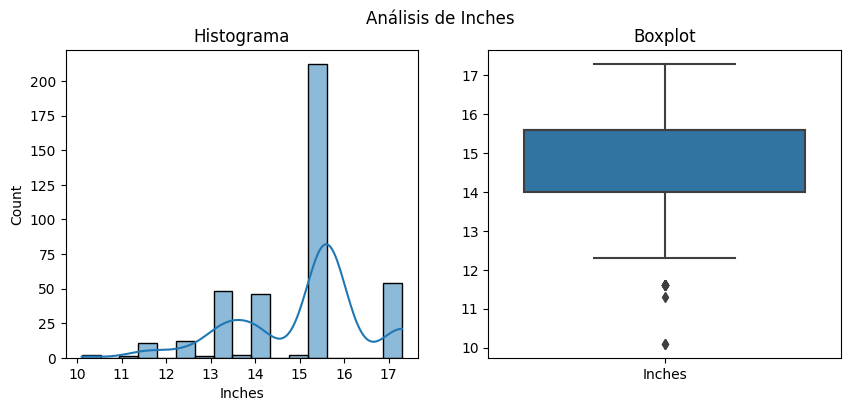

La columna Inches no presenta una distribución normal



Análisis univariante de ScreenResolution:
Variable categórica:
-Valores únicos:
1920x1080    268
1366x768      81
3840x2160     11
1600x900       7
3200x1800      7
2560x1440      6
2560x1600      4
1920x1200      3
2160x1440      1
2400x1600      1
2736x1824      1
2880x1800      1
Name: ScreenResolution, dtype: int64
-Número de valores únicos: 12




Análisis univariante de Cpu:
Variable categórica:
-Valores únicos:
Intel Core i5 7200U               58
Intel Core i7 7700HQ              41
Intel Core i7 7500U               39
Intel Core i7 8550U               24
Intel Core i5 8250U               23
Intel Core i3 6006U               21
Intel Core i5 6200U               18
Intel Core i7 6700HQ              16
Intel Core i5 7300HQ              15
Intel Core i7 6500U               15
Intel Celeron Dual Core N3350     13
Intel Core i3 7100U               10
Intel Celeron Dual Core N3060      9
Intel Core i7 6600U                7
Int

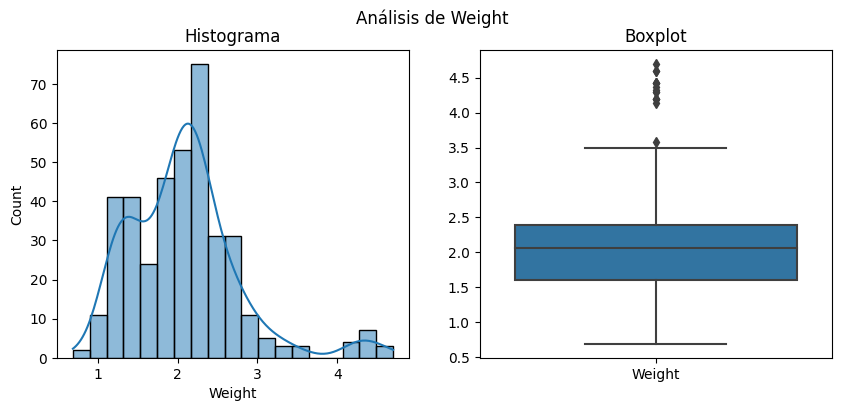

La columna Weight no presenta una distribución normal



Análisis univariante de Touchscreen:


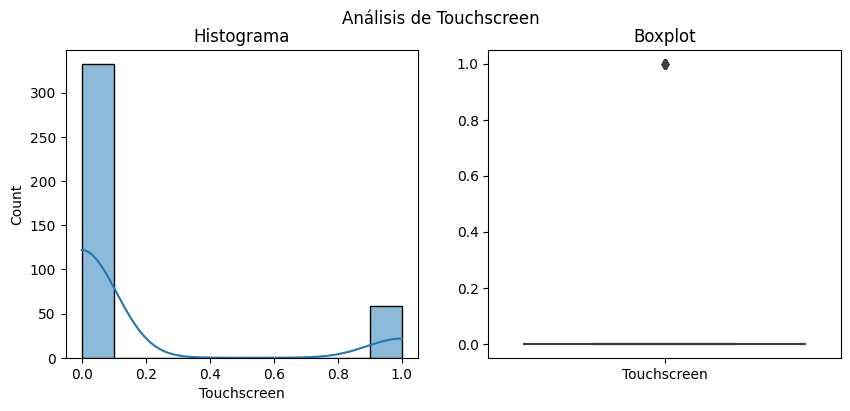

La columna Touchscreen no presenta una distribución normal



Análisis univariante de GHz:


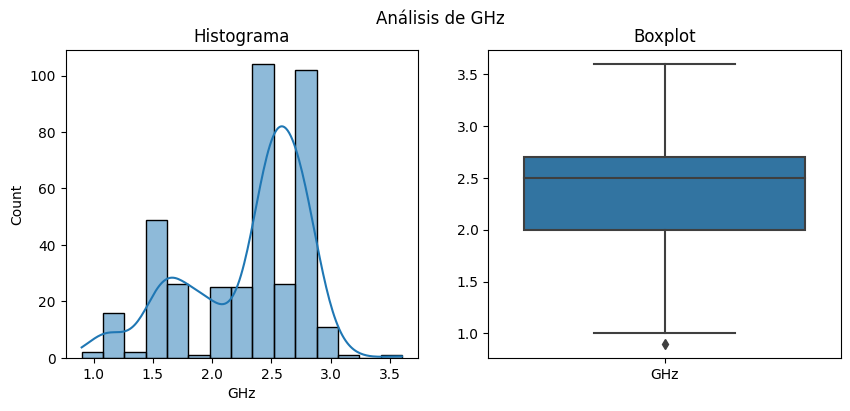

La columna GHz no presenta una distribución normal



Análisis univariante de Ram(GB):


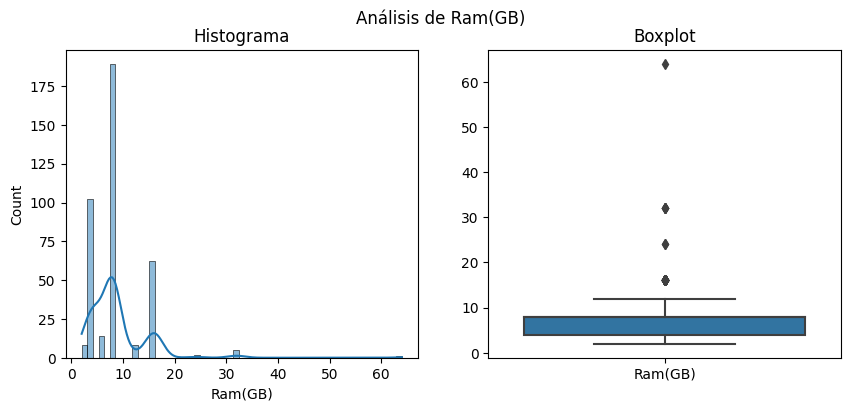

La columna Ram(GB) no presenta una distribución normal



Análisis univariante de TypeMemory1:
Variable categórica:
-Valores únicos:
SSD              252
HDD              115
Flash Storage     23
Name: TypeMemory1, dtype: int64
-Número de valores únicos: 3




Análisis univariante de TypeMemory2:
Variable categórica:
-Valores únicos:
0      324
HDD     67
Name: TypeMemory2, dtype: int64
-Número de valores únicos: 2




Análisis univariante de Memory1(GB):


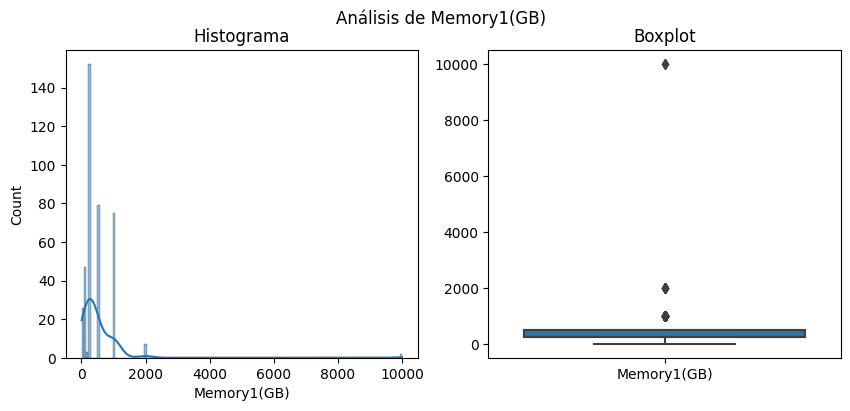

La columna Memory1(GB) no presenta una distribución normal



Análisis univariante de Memory2(GB):


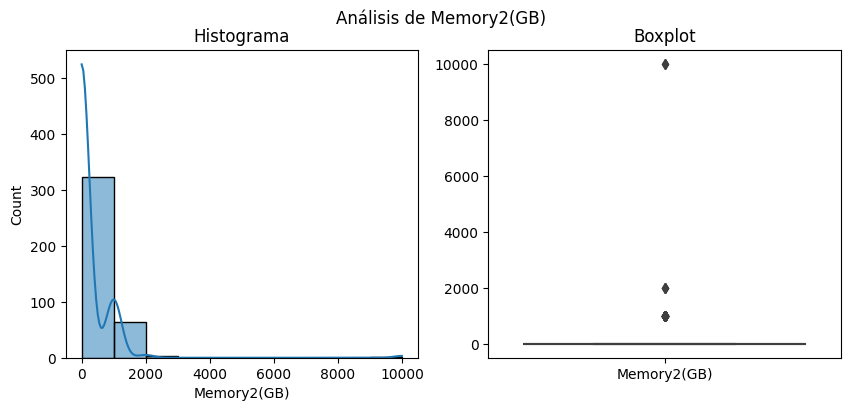

La columna Memory2(GB) no presenta una distribución normal



Número de variables que siguen una distribución normal: 0
Número de variables que no siguen una distribución normal: 7


,Media,Mediana,Moda,Varianza,Desviacion_estandar,Percentil_25,Percentil_75,K_test,p_value,Distribución
Atributos,,,,,,,,,,
Inches,15.097442,15.60,15.6,2.090147,1.445734,14.0,15.600,1.000000,0.000000e+00,No normal
Weight,2.078187,2.06,2.2,0.478579,0.691794,1.6,2.385,0.849356,9.505823e-321,No normal
Touchscreen,0.150895,0.00,0.0,0.128454,0.358405,0.0,0.000,0.500000,6.488832e-91,No normal
GHz,2.305013,2.50,2.5,0.248365,0.498362,2.0,2.700,0.873915,0.000000e+00,No normal
Ram(GB),8.644501,8.00,8.0,31.891245,5.647233,4.0,8.000,0.979508,0.000000e+00,No normal
Memory1(GB),499.764706,256.00,256.0,606319.493213,778.665200,256.0,512.000,1.000000,0.000000e+00,No normal
Memory2(GB),230.179028,0.00,0.0,654574.070431,809.057520,0.0,0.000,0.500000,6.488832e-91,No normal


In [18]:
# Realiza un análisis univariante

fn.get_univariate_analysis(test_tb)


### 4.4. Análisis bivariante<a id='44'></a>

Se realiza un análisis bivariante. Para ello se utiliza la función propia get_bivariate_analysis().

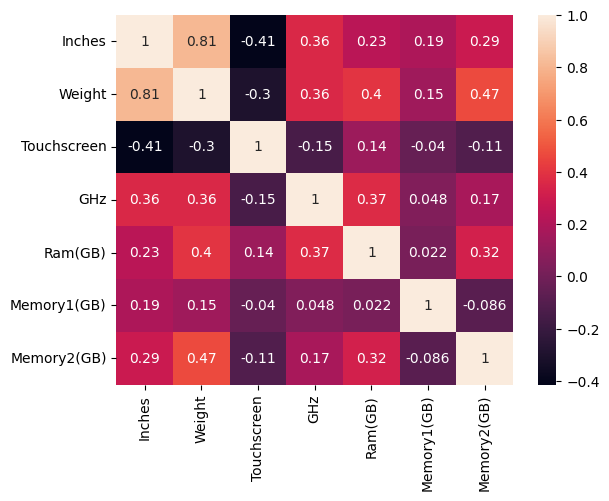

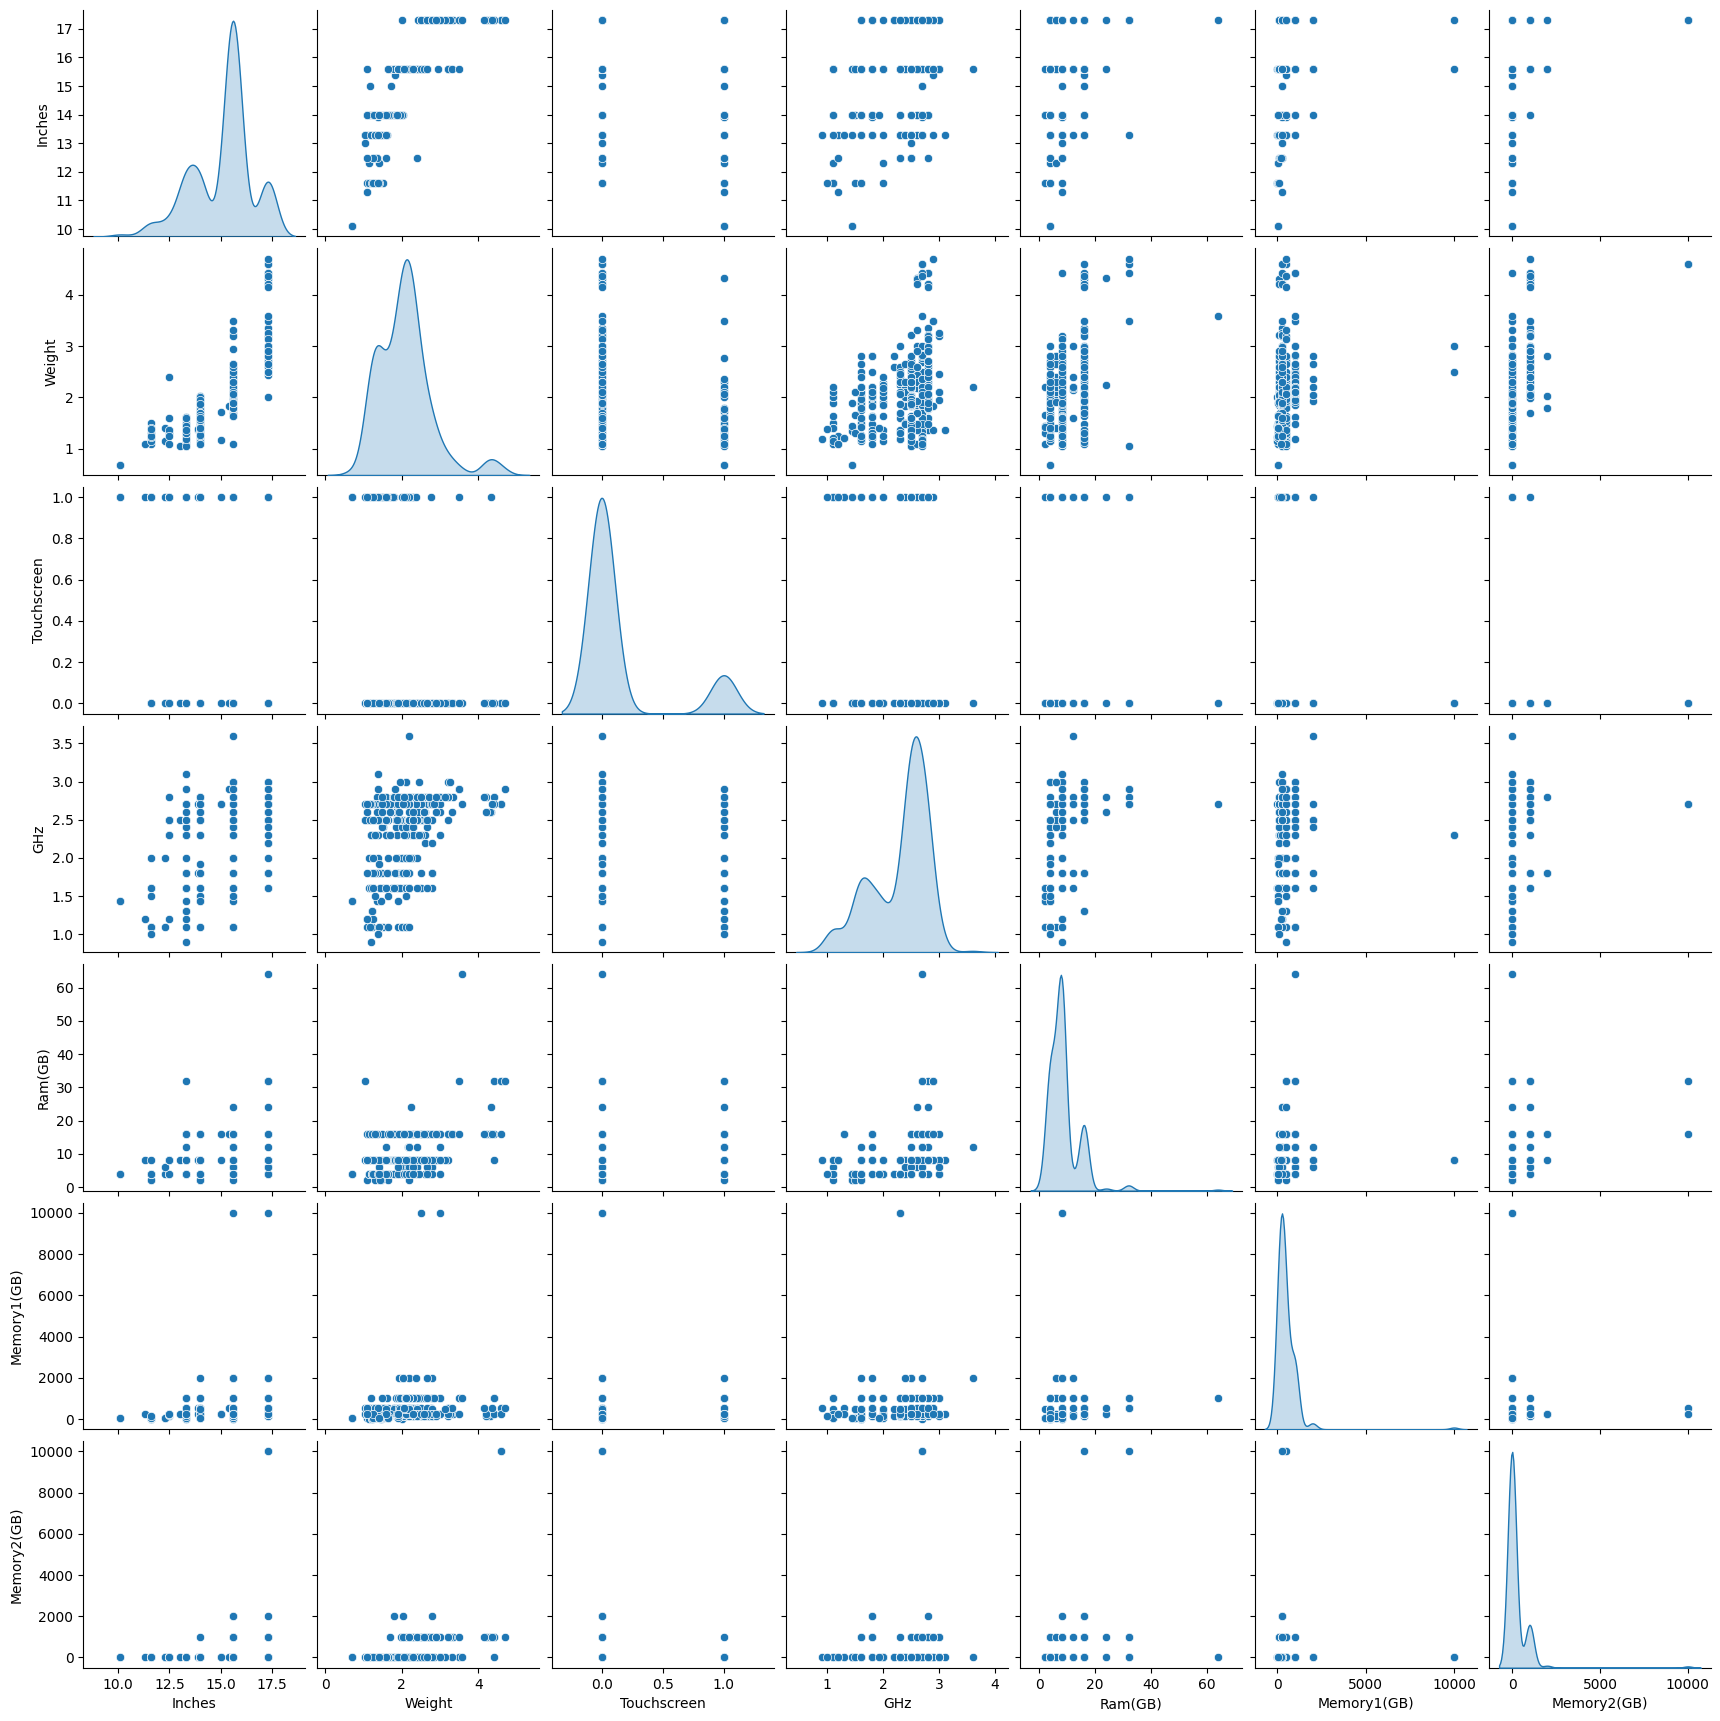

In [19]:
# Realiza un análisis bivariante

fn.get_bivariate_analysis(test_tb)


### 4.5. Outliers<a id='45'></a>  
  
Se obtienen los outliers de cada columna.

In [20]:
# Obtiene los outliers de la tabla

fn.get_outliers(test_tb)

[{'Inches': 14,
  'Weight': 15,
  'Touchscreen': 59,
  'GHz': 1,
  'Ram(GB)': 70,
  'Memory1(GB)': 84,
  'Memory2(GB)': 69},
 {'Inches': [11.6,
   11.6,
   10.1,
   10.1,
   11.3,
   11.6,
   11.6,
   11.6,
   11.6,
   11.6,
   11.6,
   11.6,
   11.6,
   11.6],
  'Weight': [4.3,
   4.42,
   4.2,
   4.33,
   4.3,
   4.42,
   4.6,
   4.2,
   4.2,
   3.58,
   4.14,
   4.6,
   4.42,
   4.7,
   4.36],
  'Touchscreen': [1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1],
  'GHz': [0.9],
  'Ram(GB)': [16,
   16,
   16,
   16,
   16,
   16,
   16,
   16,
   16,
   16,
   32,
   16,
   16,
   16,
   16,
   16,
   16,
   16,
   16,
   24,
   16,
   16,
   16,
   16,
   16,
   16,
   16,
   16,
   16,


También, aprovechamos y ya que se han realizado todos los análisis terminamos de hacer el feature engineering y ponemos todos los datos categoricos en columnas numericas de 0 o 1 para mejorar el futuro modelo de machine learning,

In [21]:
# Pasamos todas las columnas categóricas a columnas numéricas por categoría
test_tb = fn.get_categorical_columns(test_tb)

In [22]:
# Analiza rápidamente la tabla ya limpia

test_tb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 750 to 726
Columns: 183 entries, Product to HDD
dtypes: float64(3), int64(4), object(1), uint8(175)
memory usage: 102.4+ KB


### 4.6. Exportación a csv<a id='46'></a>  
  
Se exporta la tabla Sample a csv.

In [23]:
# Exporta la tabla limpia

test_tb.to_csv("data/processed/test.csv", sep=";")

## 5. Train Table<a id='5'></a>  
  
Se obtiene la tabla Train. A esta tabla se le realiza las mismas modificaciones que a la tabla Test.

In [24]:
# Importa la tabla Train

train_tb = database.get_table("Train")
train_tb


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,column1
0,1104,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.4kg,387.00,None
1,114,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23kg,1379.00,None
2,172,Acer,Aspire A517-51G,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,3kg,854.00,None
3,918,HP,Elitebook 820,Netbook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.26kg,1483.00,None
4,447,Lenovo,IdeaPad 320-15AST,Notebook,17.3,1600x900,AMD A6-Series 9220 2.5GHz,8GB,1TB HDD,AMD Radeon R4,Windows 10,2.8kg,519.00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,996,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,549.00,None
908,731,Dell,Alienware 17,Gaming,17.3,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36kg,3659.40,None
909,276,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1700 3GHz,16GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1549.00,None
910,585,MSI,GT73VR Titan,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14kg,2729.00,None


### 5.1. Exploración inicial<a id='51'></a>  
  
Se realiza una exploración inicial del dataframe. Se hace un análisis univariante antees de la limpieza para posteriormente observar la diferencia.

In [25]:
# Realiza una exploración inicial de la tabla

train_tb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
 13  column1           0 non-null      object 
dtypes: float64(2), int64(1), object(11)
memory usage: 99.9+ KB


In [26]:
# Realiza un análisis estadístico breve

train_tb.describe(include="all")


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,column1
count,912.000000,912,912,912,912.000000,912,912,912,912,912,912,912,912.000000,0
unique,NaN,19,467,6,NaN,34,96,8,32,94,9,166,NaN,0
top,NaN,Lenovo,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN,NaN
freq,NaN,215,21,515,NaN,345,133,430,293,197,751,88,NaN,NaN
mean,669.402412,NaN,NaN,NaN,14.982785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1116.964013,NaN
std,379.372130,NaN,NaN,NaN,1.417299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,681.619330,NaN
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191.900000,NaN
25%,345.750000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,598.000000,NaN
50%,676.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,NaN
75%,993.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1476.332500,NaN


Análisis univariante de laptop_ID:


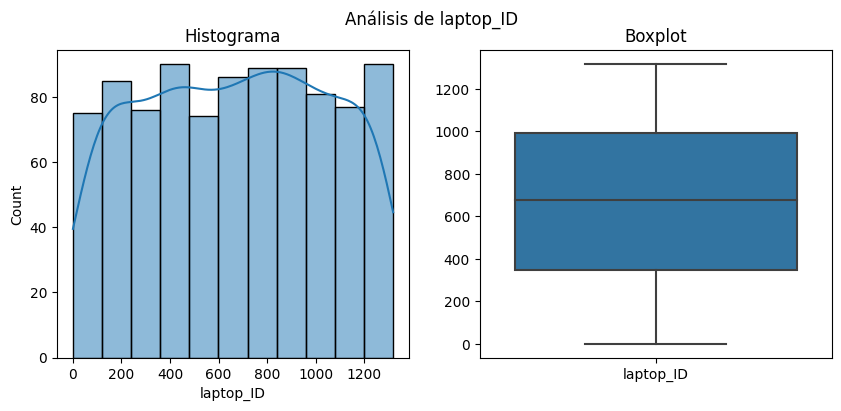

La columna laptop_ID no presenta una distribución normal



Análisis univariante de Company:
Variable categórica:
-Valores únicos:
Lenovo       215
Dell         212
HP           196
Asus         104
Acer          69
MSI           35
Toshiba       32
Apple         16
Microsoft      6
Samsung        5
Mediacom       5
Xiaomi         4
Razer          3
Google         3
Fujitsu        2
LG             2
Vero           1
Huawei         1
Chuwi          1
Name: Company, dtype: int64
-Número de valores únicos: 19




Análisis univariante de Product:
Variable categórica:
-Valores únicos:
XPS 13                                  21
Inspiron 3567                           18
250 G6                                  13
Inspiron 5570                           13
Vostro 3568                             12
                                        ..
Thinkpad T560                            1
Omen 15-ce006nv                          1
15-AY023na (N3710/8GB/2TB/W10)           1
Ideapad 520-15IKBR        

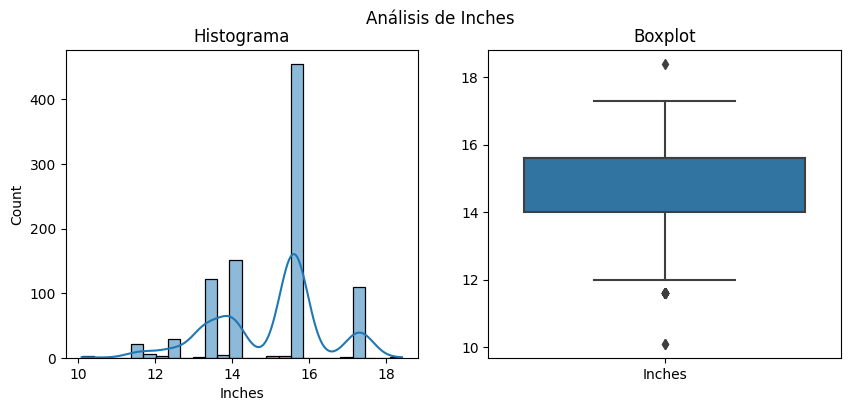

La columna Inches no presenta una distribución normal



Análisis univariante de ScreenResolution:
Variable categórica:
-Valores únicos:
Full HD 1920x1080                                345
1366x768                                         212
IPS Panel Full HD 1920x1080                      158
Full HD / Touchscreen 1920x1080                   36
IPS Panel Full HD / Touchscreen 1920x1080         32
1600x900                                          16
Quad HD+ / Touchscreen 3200x1800                  12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     10
IPS Panel 4K Ultra HD 3840x2160                   10
Touchscreen 1366x768                               9
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2560x1440                              5
4K Ultra HD / Touchscreen 3840x2160                5
4K Ultra HD 3840x2160                              5
IPS Panel Quad HD+ / Touchscreen 3200x1800         4
IPS Panel 1366x

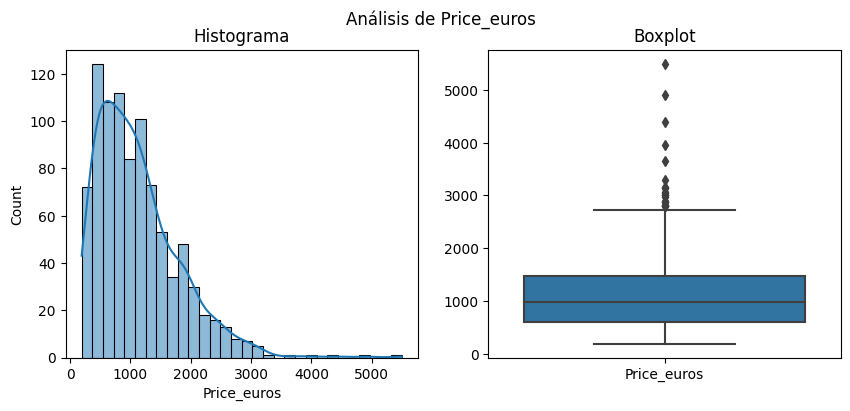

La columna Price_euros no presenta una distribución normal



Análisis univariante de column1:
Variable categórica:
-Valores únicos:
Series([], Name: column1, dtype: int64)
-Número de valores únicos: 0




Número de variables que siguen una distribución normal: 0
Número de variables que no siguen una distribución normal: 3


,Media,Mediana,Moda,Varianza,Desviacion_estandar,Percentil_25,Percentil_75,K_test,p_value,Distribución
Atributos,,,,,,,,,,
laptop_ID,669.402412,676.5,1,143923.213298,379.372130,345.75,993.0000,0.997775,0.0,No normal
Inches,14.982785,15.6,15.6,2.008737,1.417299,14.00,15.6000,1.000000,0.0,No normal
Price_euros,1116.964013,979.0,1099.0,464604.911587,681.619330,598.00,1476.3325,1.000000,0.0,No normal


In [27]:
# Realiza un análisis univariante

fn.get_univariate_analysis(train_tb)

### 5.2. Limpieza de datos<a id='52'></a>  
  
Se realiza una limpieza de datos de la tabla. Se realiza de la misma manera que se ha realizado en la tabla Test.

In [28]:
# Establece la columna laptop_ID como índice
train_tb.set_index("laptop_ID", inplace=True)

# Cambia el tipo de datos de la columna Company
train_tb["Company"] = train_tb["Company"].astype("category")

# Cambia el tipo de datos de la columna TypeName
train_tb["TypeName"] = train_tb["TypeName"].astype("category")

# Crea una nueva columna llamada Touchscreen que determina aquellos laptops que tienen Touchscreen
train_tb["Touchscreen"] = train_tb["ScreenResolution"].str.contains(
    ".*Touchscreen.*")
train_tb["Touchscreen"] = train_tb["Touchscreen"].astype("int")

# Crea dos columnas con la resolución por ancho y por altura de la pantalla llamadas ScreenResolutionWidth y ScreenResolutionHeight respectivamente. Elimina la columna ScreenResolution
train_tb["ScreenResolution"] = train_tb["ScreenResolution"].str.split(
    " ").str[-1].astype("category")

# Crea una nueva columna llamada GHz con los GHz de la Cpu
train_tb["GHz"] = train_tb["Cpu"].str.split(
    " ").str[-1].replace(r'(GHz)$', "", regex=True).astype("float")

# Cambia el tipo de datos de la columna Cpu y elimina los GHz
train_tb["Cpu"] = train_tb["Cpu"].str.replace(
    r'(\d+(\.\d{1,2})?)GHz', "", regex=True).astype("category")

# Cambia el tipo de datos de la columna Gpu
train_tb["Gpu"] = train_tb["Gpu"].astype("category")

# Cambia el tipo de datos de la columna Ram y elimina la unidad
train_tb["Ram(GB)"] = train_tb["Ram"].str.replace(
    r'(GB)$', "", regex=True).astype("int")
train_tb.drop("Ram", axis=1, inplace=True)

# Cambia el tipo de datos de la columna OpSys
train_tb["OpSys"] = train_tb["OpSys"].astype("category")

# Crea una nueva columna llamada TypeMemory que determina el tipo de memoria
TypeMemory = train_tb['Memory'].str.extract(r'\b(HDD|SSD|Flash Storage)\b(?:.*?\b(HDD|SSD|Flash storage)\b)?')
TypeMemory.columns =["TypeMemory1", "TypeMemory2"]
TypeMemory["TypeMemory2"].fillna(0, inplace=True)
TypeMemory = TypeMemory.astype("category")
train_tb = pd.concat([train_tb, TypeMemory], axis=1)


# Cambia el tipo de datos de la columna Memory y elimina la unidad. Además aparece unicamente el número
train_tb["Memory1(GB)"] = train_tb['Memory'].str.findall(r'\d+(?:\.\d+)?(?:GB|TB)?(?:\+\d+(?:\.\d+)?(?:GB|TB)?)?').str[0].str.replace(
    r'(GB)$', "", regex=True).str.replace(r'(TB)$', "000", regex=True).str.replace('.', "").astype("int")
train_tb["Memory2(GB)"] = train_tb['Memory'].str.findall(r'\d+(?:\.\d+)?(?:GB|TB)?(?:\+\d+(?:\.\d+)?(?:GB|TB)?)?').str[1].str.replace(
    r'(GB)$', "", regex=True).str.replace(r'(TB)$', "000", regex=True).str.replace('.', "").fillna(0).astype("int")
train_tb.drop("Memory", axis=1, inplace=True)

# Cambia el tipo de datos de la columna Weight y elimina la unidad
train_tb["Weight"] = train_tb["Weight"].str.replace(
    r'(kg)$', "", regex=True).astype("float")

# Elimina las columnas que tengan valores nulos
train_tb.dropna(inplace=True, axis=1, how="all")


/Users/administrador/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:48: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
/Users/administrador/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:50: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [29]:
# Muestra la tabla ya limpia

train_tb


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Gpu,OpSys,Weight,Price_euros,Touchscreen,GHz,Ram(GB),TypeMemory1,TypeMemory2,Memory1(GB),Memory2(GB)
laptop_ID,,,,,,,,,,,,,,,,,
1104,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410,AMD Radeon R5,Windows 10,2.40,387.00,0,2.2,4,HDD,0,500,0
114,Dell,XPS 13,Ultrabook,13.3,3200x1800,Intel Core i7 7560U,Intel Iris Plus Graphics 640,Windows 10,1.23,1379.00,1,2.4,8,SSD,0,256,0
172,Acer,Aspire A517-51G,Notebook,17.3,1920x1080,Intel Core i5 8250U,Nvidia GeForce MX150,Windows 10,3.00,854.00,0,1.6,8,SSD,0,256,0
918,HP,Elitebook 820,Netbook,12.5,1920x1080,Intel Core i7 7500U,Intel HD Graphics 620,Windows 10,1.26,1483.00,0,2.7,8,SSD,0,512,0
447,Lenovo,IdeaPad 320-15AST,Notebook,17.3,1600x900,AMD A6-Series 9220,AMD Radeon R4,Windows 10,2.80,519.00,0,2.5,8,HDD,0,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,1920x1080,AMD A12-Series 9720P,AMD Radeon 530,Windows 10,2.20,549.00,0,3.6,6,SSD,0,256,0
731,Dell,Alienware 17,Gaming,17.3,3840x2160,Intel Core i7 7700HQ,Nvidia GeForce GTX 1070,Windows 10,4.36,3659.40,0,2.8,32,SSD,HDD,1000,1000
276,Asus,Rog Strix,Gaming,17.3,1920x1080,AMD Ryzen 1700,AMD Radeon RX 580,Windows 10,3.20,1549.00,0,3.0,16,SSD,HDD,256,1000


### 5.3. Análisis univariante<a id='53'></a>

Se procede arealizar el análisis univariante de la tabla. Para ello se usa la función propia get_univariate_analysis. Se compara con el análisis univariante previo.

Análisis univariante de Company:
Variable categórica:
-Valores únicos:
Lenovo       215
Dell         212
HP           196
Asus         104
Acer          69
MSI           35
Toshiba       32
Apple         16
Microsoft      6
Samsung        5
Mediacom       5
Xiaomi         4
Google         3
Razer          3
Fujitsu        2
LG             2
Huawei         1
Chuwi          1
Vero           1
Name: Company, dtype: int64
-Número de valores únicos: 19




Análisis univariante de Product:
Variable categórica:
-Valores únicos:
XPS 13                                  21
Inspiron 3567                           18
250 G6                                  13
Inspiron 5570                           13
Vostro 3568                             12
                                        ..
Thinkpad T560                            1
Omen 15-ce006nv                          1
15-AY023na (N3710/8GB/2TB/W10)           1
Ideapad 520-15IKBR                       1
15-bw002nv (A6-9220/4GB/256GB/Radeon     1


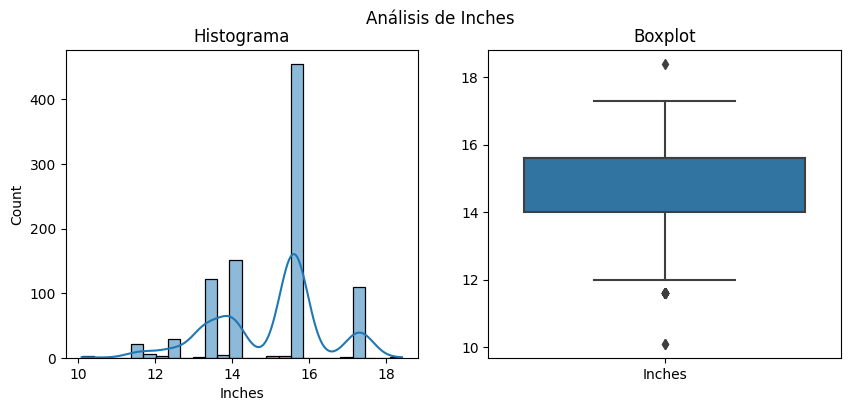

La columna Inches no presenta una distribución normal



Análisis univariante de ScreenResolution:
Variable categórica:
-Valores únicos:
1920x1080    573
1366x768     227
3840x2160     32
3200x1800     20
2560x1440     17
1600x900      16
2256x1504      6
2304x1440      6
1440x900       4
2400x1600      3
2880x1800      3
1920x1200      2
2560x1600      2
2160x1440      1
Name: ScreenResolution, dtype: int64
-Número de valores únicos: 14




Análisis univariante de Cpu:
Variable categórica:
-Valores únicos:
Intel Core i5 7200U        135
Intel Core i7 7700HQ       106
Intel Core i7 7500U         96
Intel Core i3 6006U         60
Intel Core i5 6200U         50
                          ... 
Intel Core M M3-6Y30         1
Intel Core M M7-6Y75         1
Intel Core M m3              1
Intel Core M m3-7Y30         1
Intel Xeon E3-1535M v6       1
Name: Cpu, Length: 79, dtype: int64
-Número de valores únicos: 79




Análisis univariante de Gpu:
Variable categórica:
-Valores únicos:
Intel HD 

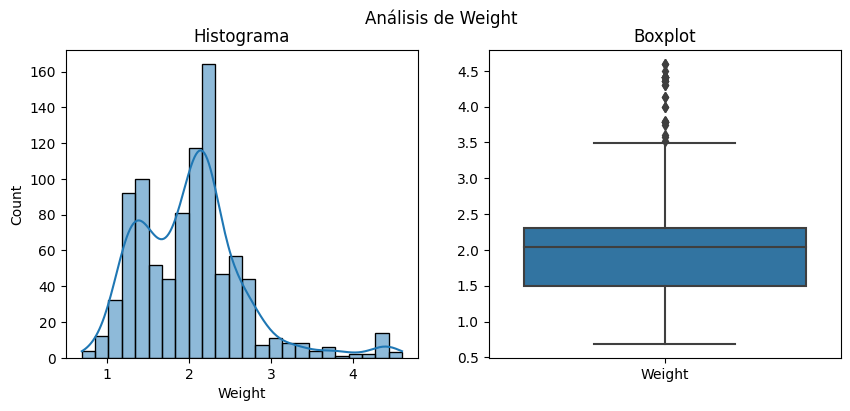

La columna Weight no presenta una distribución normal



Análisis univariante de Price_euros:


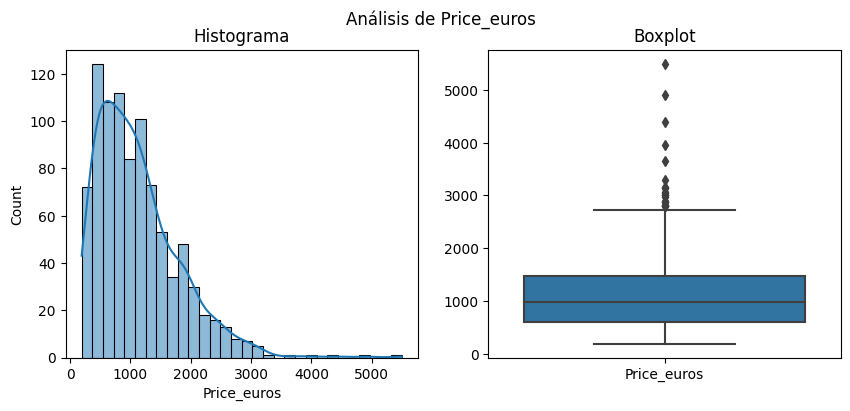

La columna Price_euros no presenta una distribución normal



Análisis univariante de Touchscreen:


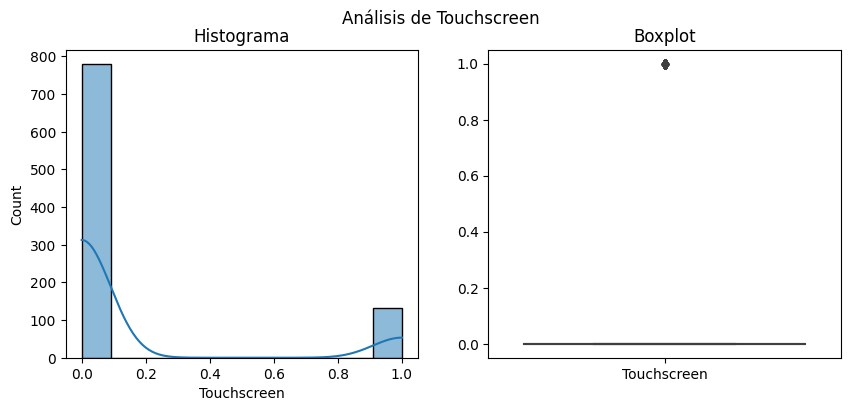

La columna Touchscreen no presenta una distribución normal



Análisis univariante de GHz:


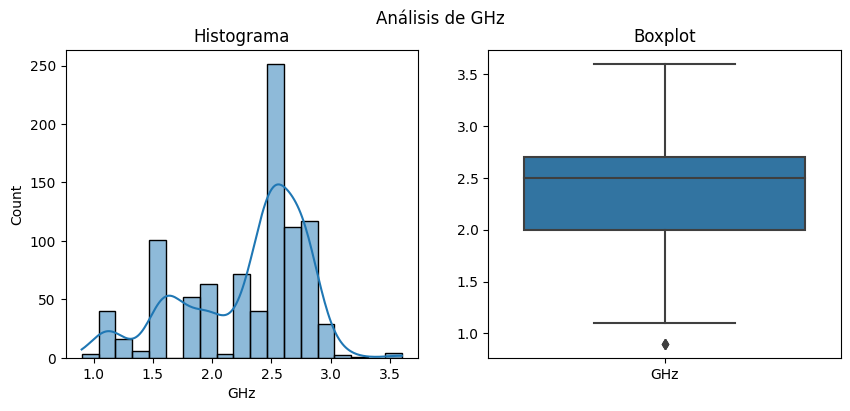

La columna GHz no presenta una distribución normal



Análisis univariante de Ram(GB):


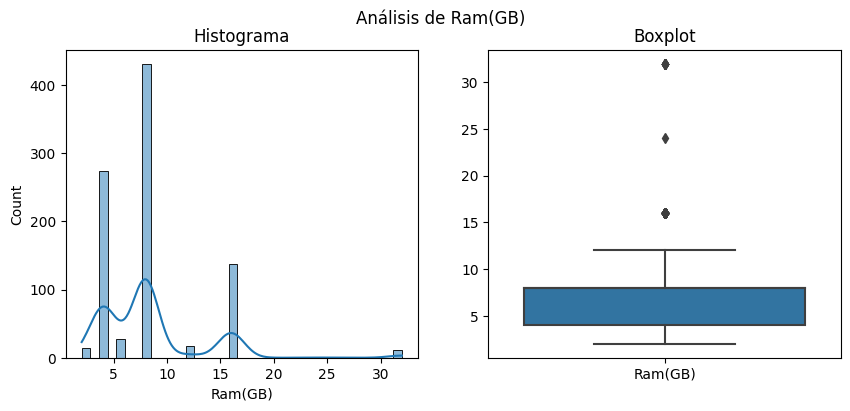

La columna Ram(GB) no presenta una distribución normal



Análisis univariante de TypeMemory1:
Variable categórica:
-Valores únicos:
SSD              591
HDD              260
Flash Storage     52
Name: TypeMemory1, dtype: int64
-Número de valores únicos: 3




Análisis univariante de TypeMemory2:
Variable categórica:
-Valores únicos:
0      773
HDD    135
SSD      4
Name: TypeMemory2, dtype: int64
-Número de valores únicos: 3




Análisis univariante de Memory1(GB):


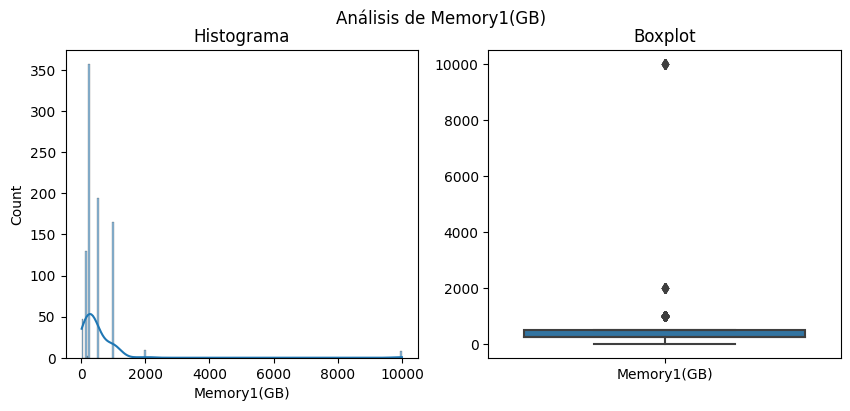

La columna Memory1(GB) no presenta una distribución normal



Análisis univariante de Memory2(GB):


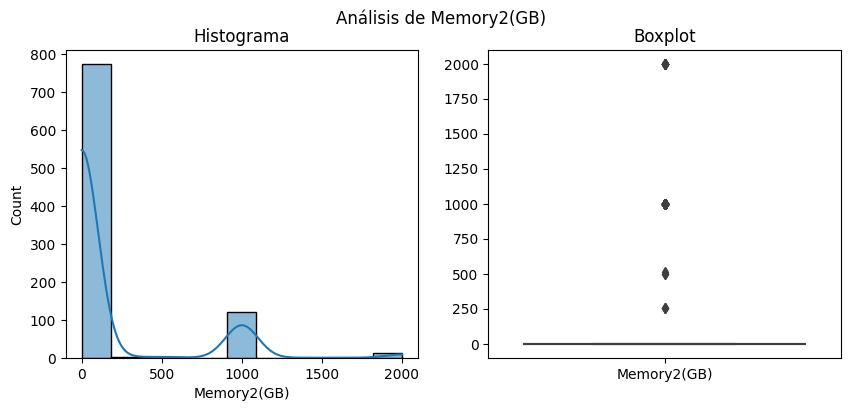

La columna Memory2(GB) no presenta una distribución normal



Número de variables que siguen una distribución normal: 0
Número de variables que no siguen una distribución normal: 8


,Media,Mediana,Moda,Varianza,Desviacion_estandar,Percentil_25,Percentil_75,K_test,p_value,Distribución
Atributos,,,,,,,,,,
Inches,14.982785,15.60,15.6,2.008737,1.417299,14.0,15.6000,1.000000,0.000000e+00,No normal
Weight,2.021819,2.04,2.2,0.427095,0.653525,1.5,2.3000,0.840211,0.000000e+00,No normal
Price_euros,1116.964013,979.00,1099.0,464604.911587,681.619330,598.0,1476.3325,1.000000,0.000000e+00,No normal
Touchscreen,0.145833,0.00,0.0,0.124703,0.353133,0.0,0.0000,0.500000,2.346767e-211,No normal
GHz,2.296096,2.50,2.5,0.260070,0.509971,2.0,2.7000,0.867350,0.000000e+00,No normal
Ram(GB),8.269737,8.00,8.0,23.255373,4.822382,4.0,8.0000,0.984617,0.000000e+00,No normal
Memory1(GB),516.798246,256.00,256.0,914147.577253,956.110651,256.0,512.0000,1.000000,0.000000e+00,No normal
Memory2(GB),161.491228,0.00,0.0,160454.801240,400.568098,0.0,0.0000,0.500000,2.346767e-211,No normal


In [30]:
# Realiza un análisis univariante

fn.get_univariate_analysis(train_tb)


### 5.4. Análisis bivariante<a id='54'></a>

Se realiza un análisis bivariante.

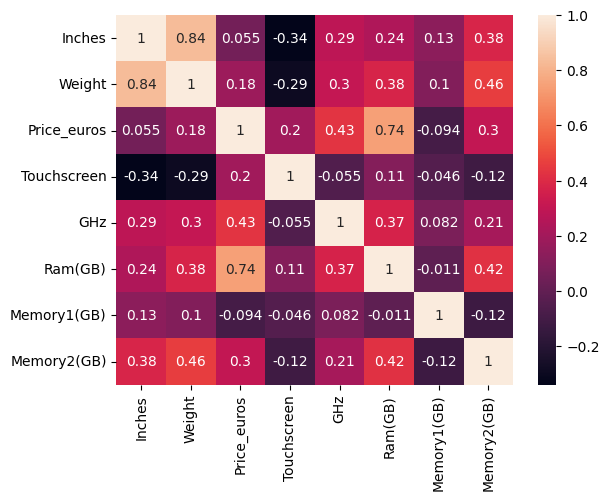

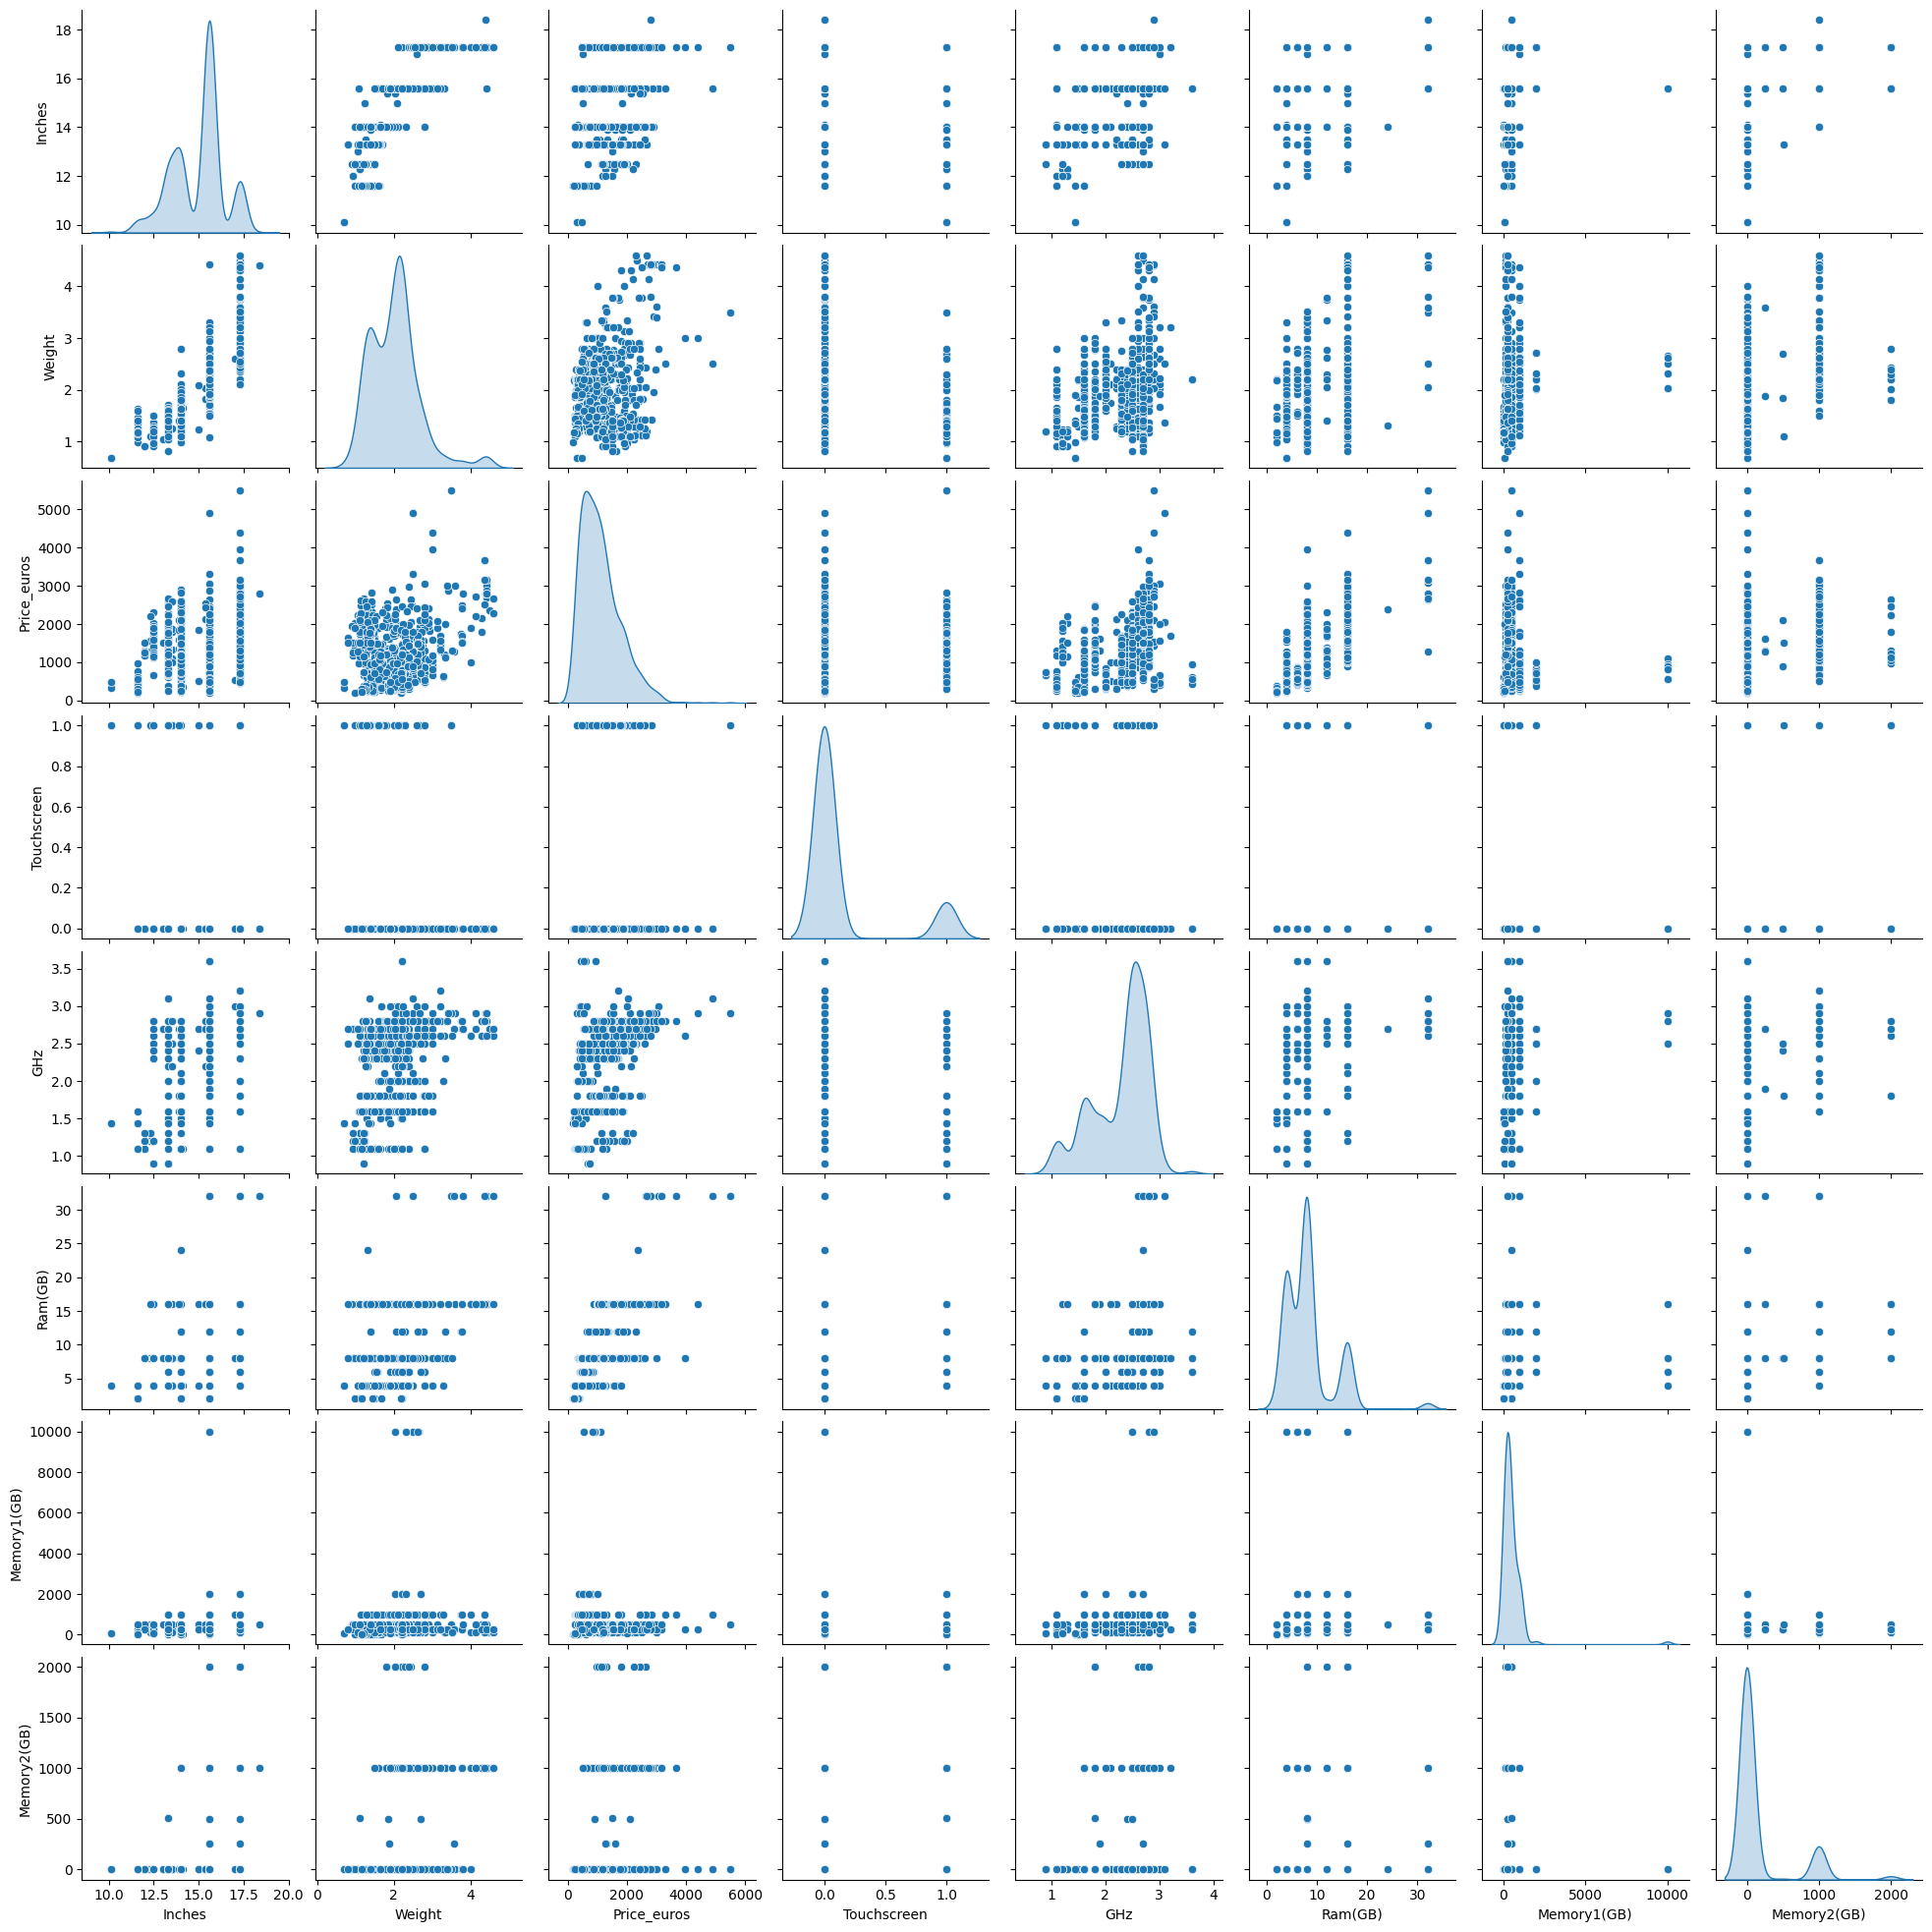

In [31]:
# Realiza un análisis bivariante

fn.get_bivariate_analysis(train_tb)

### 5.5. Outliers<a id='55'></a>  
  
Se obtienen los outliers de cada columna.

In [32]:
# Obtiene los outliers de la tabla

fn.get_outliers(train_tb)

[{'Inches': 25,
  'Weight': 31,
  'Price_euros': 23,
  'Touchscreen': 133,
  'GHz': 3,
  'Ram(GB)': 151,
  'Memory1(GB)': 182,
  'Memory2(GB)': 139},
 {'Inches': [11.6,
   11.6,
   11.6,
   18.4,
   11.6,
   11.6,
   11.6,
   11.6,
   11.6,
   11.6,
   11.6,
   11.6,
   11.6,
   10.1,
   11.6,
   10.1,
   11.6,
   11.6,
   11.6,
   11.6,
   11.6,
   11.6,
   11.6,
   11.6,
   11.6],
  'Weight': [4.42,
   4.42,
   4.0,
   3.78,
   4.4,
   4.5,
   4.42,
   4.42,
   3.74,
   4.42,
   3.6,
   4.3,
   4.14,
   3.78,
   4.0,
   4.42,
   3.78,
   4.42,
   4.6,
   3.78,
   3.58,
   3.78,
   4.36,
   4.36,
   4.3,
   3.8,
   3.52,
   4.42,
   4.6,
   4.36,
   4.14],
  'Price_euros': [2899.0,
   3072.89,
   2799.0,
   3055.0,
   3147.37,
   3012.77,
   2868.99,
   2999.0,
   3949.4,
   5499.0,
   2824.0,
   2884.86,
   2968.0,
   2799.0,
   3149.0,
   4389.0,
   3299.0,
   2999.0,
   3154.0,
   2799.0,
   4899.0,
   2800.0,
   3659.4],
  'Touchscreen': [1,
   1,
   1,
   1,
   1,
   1,
   1,
   

También, aprovechamos y ya que se han realizado todos los análisis terminamos de hacer el feature engineering y ponemos todos los datos categoricos en columnas numericas de 0 o 1 para mejorar el futuro modelo de machine learning,

In [33]:
# Pasamos todas las columnas categóricas a columnas numéricas por categoría
train_tb = fn.get_categorical_columns(train_tb)

In [34]:
# Analiza rápidamente la tabla ya limpia

train_tb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 1104 to 1173
Columns: 236 entries, Product to SSD
dtypes: float64(4), int64(4), object(1), uint8(227)
memory usage: 305.7+ KB


In [35]:
pd.set_option('display.max_columns', None)

train_tb

,Product,Inches,Weight,Price_euros,Touchscreen,GHz,Ram(GB),Memory1(GB),Memory2(GB),Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,1366x768,1440x900,1600x900,1920x1080,1920x1200,2160x1440,2256x1504,2304x1440,2400x1600,2560x1440,2560x1600,2880x1800,3200x1800,3840x2160,AMD A10-Series 9600P,AMD A10-Series 9620P,AMD A12-Series 9720P,AMD A6-Series 7310,AMD A6-Series 9220,AMD A6-Series A6-9220,AMD A8-Series 7410,AMD A9-Series 9410,AMD A9-Series 9420,AMD A9-Series A9-9420,AMD E-Series 6110,AMD E-Series 7110,AMD E-Series 9000,AMD E-Series E2-9000,AMD E-Series E2-9000e,AMD FX 8800P,AMD Ryzen 1600,AMD Ryzen 1700,Intel Atom x5-Z8300,Intel Atom x5-Z8350,Intel Atom x5-Z8550,Intel Celeron Dual Core 3205U,Intel Celeron Dual Core 3855U,Intel Celeron Dual Core N3050,Intel Celeron Dual Core N3060,Intel Celeron Dual Core N3350,Intel Celeron Quad Core N3160,Intel Celeron Quad Core N3450,Intel Celeron Quad Core N3710,Intel Core M,Intel Core M 6Y30,Intel Core M 6Y75,Intel Core M M3-6Y30,Intel Core M M7-6Y75,Intel Core M m3,Intel Core M m3-7Y30,Intel Core i3 6006U,Intel Core i3 6100U,Intel Core i3 7100U,Intel Core i3 7130U,Intel Core i5,Intel Core i5 6200U,Intel Core i5 6300HQ,Intel Core i5 6300U,Intel Core i5 6440HQ,Intel Core i5 7200U,Intel Core i5 7300HQ,Intel Core i5 7300U,Intel Core i5 7440HQ,Intel Core i5 7Y54,Intel Core i5 7Y57,Intel Core i5 8250U,Intel Core i7,Intel Core i7 6500U,Intel Core i7 6560U,Intel Core i7 6600U,Intel Core i7 6700HQ,Intel Core i7 6820HK,Intel Core i7 6820HQ,Intel Core i7 6920HQ,Intel Core i7 7500U,Intel Core i7 7560U,Intel Core i7 7600U,Intel Core i7 7660U,Intel Core i7 7700HQ,Intel Core i7 7820HK,Intel Core i7 7820HQ,Intel Core i7 7Y75,Intel Core i7 8550U,Intel Core i7 8650U,Intel Pentium Dual Core 4405U,Intel Pentium Dual Core 4405Y,Intel Pentium Dual Core N4200,Intel Pentium Quad Core N3700,Intel Pentium Quad Core N3710,Intel Pentium Quad Core N4200,Intel Xeon E3-1505M V6,Intel Xeon E3-1535M v5,Intel Xeon E3-1535M v6,AMD FirePro W4190M,AMD FirePro W5130M,AMD R17M-M1-70,AMD R4 Graphics,AMD Radeon 520,AMD Radeon 530,AMD Radeon Pro 455,AMD Radeon Pro 555,AMD Radeon R2,AMD Radeon R2 Graphics,AMD Radeon R4,AMD Radeon R4 Graphics,AMD Radeon R5,AMD Radeon R5 430,AMD Radeon R5 520,AMD Radeon R5 M315,AMD Radeon R5 M330,AMD Radeon R5 M420,AMD Radeon R5 M420X,AMD Radeon R5 M430,AMD Radeon R7,AMD Radeon R7 M360,AMD Radeon R7 M365X,AMD Radeon R7 M440,AMD Radeon R7 M445,AMD Radeon R7 M460,AMD Radeon R7 M465,AMD Radeon R9 M385,AMD Radeon RX 540,AMD Radeon RX 550,AMD Radeon RX 580,Intel Graphics 620,Intel HD Graphics,Intel HD Graphics 400,Intel HD Graphics 405,Intel HD Graphics 500,Intel HD Graphics 505,Intel HD Graphics 510,Intel HD Graphics 515,Intel HD Graphics 520,Intel HD Graphics 530,Intel HD Graphics 5300,Intel HD Graphics 6000,Intel HD Graphics 615,Intel HD Graphics 620,Intel HD Graphics 620,Intel HD Graphics 630,Intel Iris Graphics 540,Intel Iris Plus Graphics 640,Intel Iris Plus Graphics 650,Intel Iris Pro Graphics,Intel UHD Graphics 620,Nvidia GTX 980 SLI,Nvidia GeForce 150MX,Nvidia GeForce 920,Nvidia GeForce 920M,Nvidia GeForce 920MX,Nvidia GeForce 920MX,Nvidia GeForce 930M,Nvidia GeForce 930MX,Nvidia GeForce 930MX,Nvidia GeForce 940M,Nvidia GeForce 940MX,Nvidia GeForce 960M,Nvidia GeForce GT 940MX,Nvidia GeForce GTX 1050,Nvidia GeForce GTX 1050 Ti,Nvidia GeForce GTX 1050M,Nvidia GeForce GTX 1050Ti,Nvidia GeForce GTX 1060,Nvidia GeForce GTX 1070,Nvidia GeForce GTX 1080,Nvidia GeForce GTX 930MX,Nvidia GeForce GTX 940MX,Nvidia GeForce GTX 950M,Nvidia GeForce GTX 960,Nvidia GeForce GTX 960<U+039C>,Nvidia GeForce GTX 960M,Nvidia GeForce GTX 965M,Nvidia GeForce GTX 970M,Nvidia GeForce GTX 980M,Nvidia GeForce GTX1060,Nvidia GeForce MX130,Nvidia GeForce MX150,Nvidia Quadro 3000M,Nvidia Quadro M1000M,Nvidia Quadro M1200,Nvidia Quadro M2000M,Nvidia Quadro M2200,Nvidia Quadro M2200M,Nvidia Quadr

### 5.6. Exportación a csv<a id='56'></a>  
  
Se exporta la tabla Sample a csv.

In [36]:
# Exporta la tabla limpia

train_tb.to_csv("data/processed/train.csv", sep=";")

In [37]:
test_tb

,Product,Inches,Weight,Touchscreen,GHz,Ram(GB),Memory1(GB),Memory2(GB),Acer,Apple,Asus,Chuwi,Dell,Fujitsu,HP,Huawei,LG,Lenovo,MSI,Mediacom,Razer,Samsung,Toshiba,Vero,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,1366x768,1600x900,1920x1080,1920x1200,2160x1440,2400x1600,2560x1440,2560x1600,2736x1824,2880x1800,3200x1800,3840x2160,AMD A10-Series 9600P,AMD A10-Series A10-9620P,AMD A12-Series 9700P,AMD A12-Series 9720P,AMD A4-Series 7210,AMD A6-Series 9220,AMD A8-Series 7410,AMD A9-Series 9420,AMD A9-Series A9-9420,AMD E-Series 7110,AMD E-Series 9000e,AMD E-Series E2-6110,AMD E-Series E2-9000e,AMD FX 9830P,AMD Ryzen 1700,Intel Atom X5-Z8350,Intel Atom Z8350,Intel Atom x5-Z8350,Intel Atom x5-Z8550,Intel Celeron Dual Core 3205U,Intel Celeron Dual Core 3855U,Intel Celeron Dual Core N3050,Intel Celeron Dual Core N3060,Intel Celeron Dual Core N3350,Intel Celeron Quad Core N3450,Intel Core M 6Y30,Intel Core M 6Y54,Intel Core M 6Y75,Intel Core M 7Y30,Intel Core M m7-6Y75,Intel Core i3 6006U,Intel Core i3 6100U,Intel Core i3 7100U,Intel Core i3 7130U,Intel Core i5,Intel Core i5 6200U,Intel Core i5 6260U,Intel Core i5 6300HQ,Intel Core i5 6300U,Intel Core i5 7200U,Intel Core i5 7300HQ,Intel Core i5 7300U,Intel Core i5 7440HQ,Intel Core i5 7500U,Intel Core i5 7Y54,Intel Core i5 8250U,Intel Core i7,Intel Core i7 6500U,Intel Core i7 6600U,Intel Core i7 6700HQ,Intel Core i7 6820HK,Intel Core i7 6820HQ,Intel Core i7 7500U,Intel Core i7 7600U,Intel Core i7 7700HQ,Intel Core i7 7820HK,Intel Core i7 7Y75,Intel Core i7 8550U,Intel Pentium Quad Core N3710,Samsung Cortex A72&A53,AMD FirePro W4190M,AMD FirePro W6150M,AMD Radeon 520,AMD Radeon 530,AMD Radeon 540,AMD Radeon Pro 560,AMD Radeon R2,AMD Radeon R2 Graphics,AMD Radeon R3,AMD Radeon R4 Graphics,AMD Radeon R5,AMD Radeon R5 M330,AMD Radeon R5 M420,AMD Radeon R5 M420X,AMD Radeon R5 M430,AMD Radeon R7 Graphics,AMD Radeon R7 M440,AMD Radeon R7 M445,AMD Radeon RX 540,AMD Radeon RX 550,AMD Radeon RX 560,AMD Radeon RX 580,ARM Mali T860 MP4,Intel HD Graphics,Intel HD Graphics 400,Intel HD Graphics 405,Intel HD Graphics 500,Intel HD Graphics 510,Intel HD Graphics 515,Intel HD Graphics 520,Intel HD Graphics 540,Intel HD Graphics 615,Intel HD Graphics 620,Intel Iris Graphics 540,Intel Iris Graphics 550,Intel Iris Plus Graphics 640,Intel Iris Plus Graphics 650,Intel UHD Graphics 620,Nvidia GeForce 920MX,Nvidia GeForce 920MX,Nvidia GeForce 930M,Nvidia GeForce 930MX,Nvidia GeForce 930MX,Nvidia GeForce 940MX,Nvidia GeForce GTX 1050,Nvidia GeForce GTX 1050 Ti,Nvidia GeForce GTX 1060,Nvidia GeForce GTX 1070,Nvidia GeForce GTX 1070M,Nvidia GeForce GTX 1080,Nvidia GeForce GTX 940M,Nvidia GeForce GTX 940MX,Nvidia GeForce GTX 950M,Nvidia GeForce GTX 960,Nvidia GeForce GTX 960M,Nvidia GeForce GTX 965M,Nvidia GeForce GTX 970M,Nvidia GeForce GTX 980,Nvidia GeForce GTX 980M,Nvidia GeForce GTX1050 Ti,Nvidia GeForce GTX1080,Nvidia GeForce MX130,Nvidia GeForce MX150,Nvidia Quadro M1000M,Nvidia Quadro M1200,Nvidia Quadro M2000M,Nvidia Quadro M500M,Nvidia Quadro M620,Android,Chrome OS,Linux,No OS,Windows 10,Windows 10 S,Windows 7,macOS,Flash Storage,HDD,SSD,0,HDD
laptop_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
750,Tecra X40-D-10G,14.0,1.25,1,2.50,8,256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
633,SmartBook 140,14.0,1.40,0,1.44,2,32,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [38]:
train_tb

,Product,Inches,Weight,Price_euros,Touchscreen,GHz,Ram(GB),Memory1(GB),Memory2(GB),Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,1366x768,1440x900,1600x900,1920x1080,1920x1200,2160x1440,2256x1504,2304x1440,2400x1600,2560x1440,2560x1600,2880x1800,3200x1800,3840x2160,AMD A10-Series 9600P,AMD A10-Series 9620P,AMD A12-Series 9720P,AMD A6-Series 7310,AMD A6-Series 9220,AMD A6-Series A6-9220,AMD A8-Series 7410,AMD A9-Series 9410,AMD A9-Series 9420,AMD A9-Series A9-9420,AMD E-Series 6110,AMD E-Series 7110,AMD E-Series 9000,AMD E-Series E2-9000,AMD E-Series E2-9000e,AMD FX 8800P,AMD Ryzen 1600,AMD Ryzen 1700,Intel Atom x5-Z8300,Intel Atom x5-Z8350,Intel Atom x5-Z8550,Intel Celeron Dual Core 3205U,Intel Celeron Dual Core 3855U,Intel Celeron Dual Core N3050,Intel Celeron Dual Core N3060,Intel Celeron Dual Core N3350,Intel Celeron Quad Core N3160,Intel Celeron Quad Core N3450,Intel Celeron Quad Core N3710,Intel Core M,Intel Core M 6Y30,Intel Core M 6Y75,Intel Core M M3-6Y30,Intel Core M M7-6Y75,Intel Core M m3,Intel Core M m3-7Y30,Intel Core i3 6006U,Intel Core i3 6100U,Intel Core i3 7100U,Intel Core i3 7130U,Intel Core i5,Intel Core i5 6200U,Intel Core i5 6300HQ,Intel Core i5 6300U,Intel Core i5 6440HQ,Intel Core i5 7200U,Intel Core i5 7300HQ,Intel Core i5 7300U,Intel Core i5 7440HQ,Intel Core i5 7Y54,Intel Core i5 7Y57,Intel Core i5 8250U,Intel Core i7,Intel Core i7 6500U,Intel Core i7 6560U,Intel Core i7 6600U,Intel Core i7 6700HQ,Intel Core i7 6820HK,Intel Core i7 6820HQ,Intel Core i7 6920HQ,Intel Core i7 7500U,Intel Core i7 7560U,Intel Core i7 7600U,Intel Core i7 7660U,Intel Core i7 7700HQ,Intel Core i7 7820HK,Intel Core i7 7820HQ,Intel Core i7 7Y75,Intel Core i7 8550U,Intel Core i7 8650U,Intel Pentium Dual Core 4405U,Intel Pentium Dual Core 4405Y,Intel Pentium Dual Core N4200,Intel Pentium Quad Core N3700,Intel Pentium Quad Core N3710,Intel Pentium Quad Core N4200,Intel Xeon E3-1505M V6,Intel Xeon E3-1535M v5,Intel Xeon E3-1535M v6,AMD FirePro W4190M,AMD FirePro W5130M,AMD R17M-M1-70,AMD R4 Graphics,AMD Radeon 520,AMD Radeon 530,AMD Radeon Pro 455,AMD Radeon Pro 555,AMD Radeon R2,AMD Radeon R2 Graphics,AMD Radeon R4,AMD Radeon R4 Graphics,AMD Radeon R5,AMD Radeon R5 430,AMD Radeon R5 520,AMD Radeon R5 M315,AMD Radeon R5 M330,AMD Radeon R5 M420,AMD Radeon R5 M420X,AMD Radeon R5 M430,AMD Radeon R7,AMD Radeon R7 M360,AMD Radeon R7 M365X,AMD Radeon R7 M440,AMD Radeon R7 M445,AMD Radeon R7 M460,AMD Radeon R7 M465,AMD Radeon R9 M385,AMD Radeon RX 540,AMD Radeon RX 550,AMD Radeon RX 580,Intel Graphics 620,Intel HD Graphics,Intel HD Graphics 400,Intel HD Graphics 405,Intel HD Graphics 500,Intel HD Graphics 505,Intel HD Graphics 510,Intel HD Graphics 515,Intel HD Graphics 520,Intel HD Graphics 530,Intel HD Graphics 5300,Intel HD Graphics 6000,Intel HD Graphics 615,Intel HD Graphics 620,Intel HD Graphics 620,Intel HD Graphics 630,Intel Iris Graphics 540,Intel Iris Plus Graphics 640,Intel Iris Plus Graphics 650,Intel Iris Pro Graphics,Intel UHD Graphics 620,Nvidia GTX 980 SLI,Nvidia GeForce 150MX,Nvidia GeForce 920,Nvidia GeForce 920M,Nvidia GeForce 920MX,Nvidia GeForce 920MX,Nvidia GeForce 930M,Nvidia GeForce 930MX,Nvidia GeForce 930MX,Nvidia GeForce 940M,Nvidia GeForce 940MX,Nvidia GeForce 960M,Nvidia GeForce GT 940MX,Nvidia GeForce GTX 1050,Nvidia GeForce GTX 1050 Ti,Nvidia GeForce GTX 1050M,Nvidia GeForce GTX 1050Ti,Nvidia GeForce GTX 1060,Nvidia GeForce GTX 1070,Nvidia GeForce GTX 1080,Nvidia GeForce GTX 930MX,Nvidia GeForce GTX 940MX,Nvidia GeForce GTX 950M,Nvidia GeForce GTX 960,Nvidia GeForce GTX 960<U+039C>,Nvidia GeForce GTX 960M,Nvidia GeForce GTX 965M,Nvidia GeForce GTX 970M,Nvidia GeForce GTX 980M,Nvidia GeForce GTX1060,Nvidia GeForce MX130,Nvidia GeForce MX150,Nvidia Quadro 3000M,Nvidia Quadro M1000M,Nvidia Quadro M1200,Nvidia Quadro M2000M,Nvidia Quadro M2200,Nvidia Quadro M2200M,Nvidia Quadr